In [44]:
%load_ext autoreload
%autoreload 2

import numpy as np

%matplotlib widget

import matplotlib

import matplotlib.pyplot as plt
import sanpy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


  version: 0.0.4
  reduceFraction: 0
  lineWidth: 1
  imageFilterKenel: 0
  lineFilterKernel: 5
  detectPosNeg: pos
  percentOfMax: 0.30000000000000004
  lRoi: 0
  tRoi: 293
  rRoi: 1000
  bRoi: 22
  umPerPixel: 0.414
  secondsPerLine: 0.004505
  bitDepth: 16
  dtype: <class 'str'>


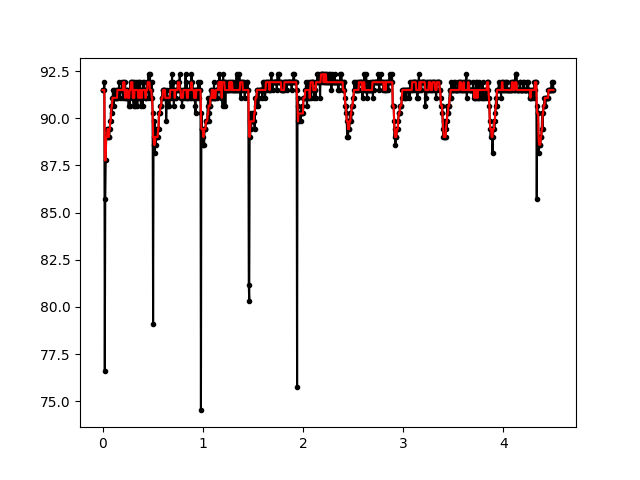

In [46]:
# remember, need to load channel 2 to also load analysis (_C002T001)
path='/media/cudmore/data/Dropbox/data/cell-shortening/Low resolution files_kymographs analysis/cell02_0002.tif.frames/cell02_0002_C002T001.tif'

ba = sanpy.bAnalysis(path, verbose=False)

ba.kymAnalysis.printAnlysisParam()

time_sec = ba.kymAnalysis.getResults("time_sec")
diameter_um = ba.kymAnalysis.getResults("diameter_um")
diameter_pnts = ba.kymAnalysis.getResults("diameter_pnts")

# diameter_um_filt has hard coded median filter of 5
diameter_um_filt = ba.kymAnalysis.getResults("diameter_um_filt")

fig, ax1 = plt.subplots()
ax1.plot(time_sec, diameter_um, 'k.-');
ax1.plot(time_sec, diameter_um_filt, 'r');

## Reanalyze with analyzeDiameter lineWidth of 3 (all previous were 1)

For interp1d, see:
https://stackoverflow.com/questions/65091821/how-to-do-a-interpolation-by-using-thresholds-with-python

In [47]:
lineWidth = 3
ba.kymAnalysis.setAnalysisParam('lineWidth', lineWidth)
ba.kymAnalysis.setAnalysisParam('imageFilterKenel', 0)
ba.kymAnalysis.setAnalysisParam('lineFilterKernel', 3)

ba.kymAnalysis.analyzeDiameter(verbose=False)

# replot
# time_sec = ba.kymAnalysis.getResults("time_sec")
diameter_um2 = ba.kymAnalysis.getResults("diameter_um")

diameter_pnts2 = ba.kymAnalysis.getResults("diameter_pnts")

# diameter_um_filt has hard coded median filter of 5
#diameter_um_filt2 = ba.kymAnalysis.getResults("diameter_um_filt")

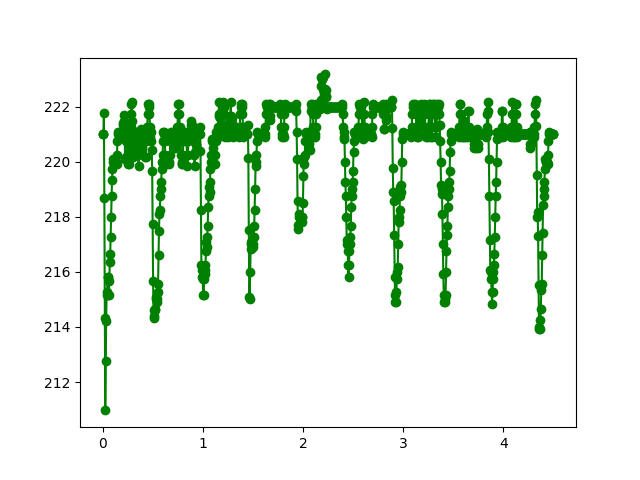

In [65]:
fig, ax1 = plt.subplots()

# ax1.plot(time_sec, diameter_pnts2, 'k.-');
# ax1.plot(time_sec, diameter_pnts, 'r');

import scipy.signal
medianFilter = 5
_medFilt = scipy.signal.medfilt(diameter_pnts, medianFilter)

SavitzkyGolay_pnts = 5
SavitzkyGolay_poly = 2
_filteredY = scipy.signal.savgol_filter(
    _medFilt,
    SavitzkyGolay_pnts,
    SavitzkyGolay_poly,
    axis=0,
    mode="nearest",
)
ax1.plot(time_sec, _filteredY, 'go-');

# try interpolation
from scipy.interpolate import interp1d
x=np.arange(0,len(time_sec[:-2]))    
x=np.arange(0,len(time_sec))    
f = interp1d(x,diameter_pnts,kind="linear")
xnew = np.arange(0, len(time_sec[:-3]),0.01)
xnew = np.arange(0, len(time_sec[:-2]),0.01)
ynew = f(xnew)
# ax1.plot(xnew, ynew, 'r.');


## Now just plot left/right point rather than diameter (um)

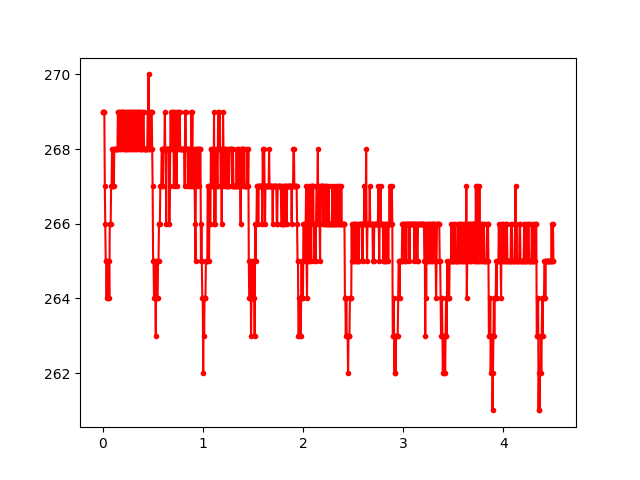

In [9]:
left_pnt = ba.kymAnalysis.getResults("left_pnt")
right_pnt = ba.kymAnalysis.getResults("right_pnt")

fig, ax1 = plt.subplots()
ax1.plot(time_sec, right_pnt, 'r.-');
